# Problem 1

In [2]:
import numpy as np

p1_mu_neg = np.random.normal(-10, 5, 1000)
p1_mu_positive = np.random.normal(10, 5, 1000)

## (a)

In [3]:
import matplotlib.pyplot as plt
def plot_gauss_distribution(distribution, title, mu, sigma):
    count, bins, ignored = plt.hist(distribution, 30, normed=True)
    plt.title(title)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                   np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()
#     plt.clf()
    


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


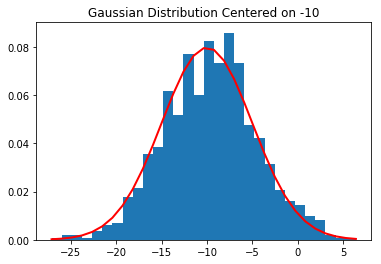

In [4]:
plot_gauss_distribution(p1_mu_neg, 'Gaussian Distribution Centered on -10', -10, 5)

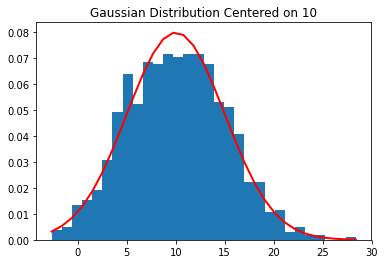

In [5]:
plot_gauss_distribution(p1_mu_positive, "Gaussian Distribution Centered on 10", 10, 5)

### 1(a) Answer

By looking at the plot below, we see that the new distribution is centered at 0 with with a higher variance than the first two.

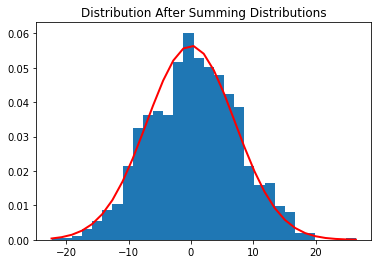

In [6]:
p1_new_sum = [p1_mu_neg[i] + p1_mu_positive[i] for i in range(len(p1_mu_neg))]
plot_gauss_distribution(p1_new_sum, "Distribution After Summing Distributions", 0, 7.07)

## (b) Answer

My estimation for the mean is 0 and the variance is approximately 50.


# Problem 2

In [7]:
import random
import statistics as stat

def generate_random_bernoulli():
    return 1 if random.randint(0, 1) else -1

def generate_z(n):
    return 1 / n * sum([generate_random_bernoulli() for _ in range(n)])

def generate_1000_z(n):
    return [generate_z(n) for _ in range(1000)]

p2_z3 = generate_1000_z(3)
p2_z5 = generate_1000_z(5)
p2_z8 = generate_1000_z(8)
p2_z50 = generate_1000_z(50)
p2_z300 = generate_1000_z(250)

print("n=3")
print(stat.stdev(p2_z3))
print(stat.mean(p2_z3))
print("n=8")
print(stat.stdev(p2_z8))
print("n=300")
print(stat.stdev(p2_z300))
print(stat.mean(p2_z300))

n=3
0.5651342407281449
-0.007333333333333333
n=8
0.34306359487729116
n=300
0.06371593414730937
0.0036160000000000003


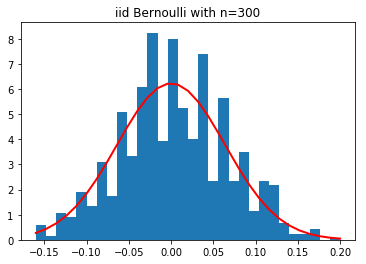

In [8]:
plot_gauss_distribution(p2_z300, "iid Bernoulli with n=300", 0, .064)

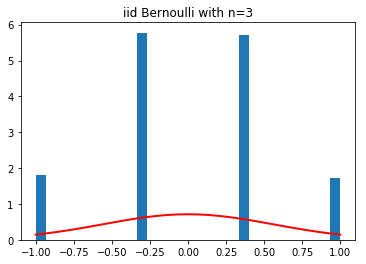

In [9]:
plot_gauss_distribution(p2_z3, "iid Bernoulli with n=3", 0, .56)

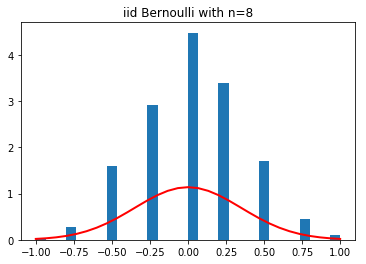

In [10]:
plot_gauss_distribution(p2_z8, "iid Bernoulli with n=8", 0, .35)

# Problem 3

In [11]:
p3_sample = np.random.normal(0, 5, 25000)

In [12]:
p3_avg = sum(p3_sample) / len(p3_sample)
p3_avg

-0.02458546249948946

In [13]:
import math

p3_std_dev = math.sqrt(sum([(x-p3_avg) ** 2 for x in p3_sample]) / (25000-1))
p3_std_dev

4.975409293621266

### Problem 3 Answer

I estimaged the average to be -.025 and the standard deviation to be 4.975.

# Problem 4

In [14]:
p4_dist = np.random.multivariate_normal([-5,5], [[20,.8],[.8,30]],10000)

In [15]:
from functools import reduce

p4_x_mean = reduce(lambda y, z: y+z, [t[0] for t in p4_dist]) / len(p4_dist)
p4_y_mean = reduce(lambda x,z: z+x, [t[1] for t in p4_dist]) / len(p4_dist)

In [16]:
p4_x_mean

-5.050979798046953

In [17]:
p4_y_mean

5.001967553365301

In [18]:
p4_variance_matrix =[
    [1/len(p4_dist - 1) * sum((t[0]-p4_x_mean)**2 for t in p4_dist), 
     1/len(p4_dist - 1) * sum((t[0] - p4_x_mean) * (t[1] - p4_y_mean) for t in p4_dist)], 
    [1/len(p4_dist - 1) * sum((t[0] - p4_x_mean) * (t[1] - p4_y_mean) for t in p4_dist), 
     1/len(p4_dist - 1) * sum((t[1] - p4_y_mean)**2 for t in p4_dist)]]

In [19]:
p4_variance_matrix

[[19.701755994633658, 0.7885865322933491],
 [0.7885865322933491, 28.87312624223446]]

# Problem 5

In [20]:
import pandas as pd

df = pd.read_csv('PatientData.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


## Part a

There are 452 patients and 279 features.

## Part b

The first 4 features are age, gender, weight, and height respectively.

## Part c

It's extremely hard to say which values are missing and which are legitimately 0. This data set would be much more easier to prune if missing values were represented as `None`.

## Part d

I would do a decision tree betwen each feature and the condition and then measure the error of the decision stump. If the error is small, that feature is clearly a strong influencer for the patient's condition.

# Written Number 2

In [22]:
A=np.matrix('1 1; 1 0; 1 0')
A

matrix([[1, 1],
        [1, 0],
        [1, 0]])

In [23]:
def calc_projection(A, point):
    A_T = np.transpose(A)
    A_T_times_A_inverted = np.linalg.inv(np.matmul(A_T, A))
    matrices_multiplied = np.matmul(np.matmul(A, A_T_times_A_inverted), A_T)
    return np.matmul(matrices_multiplied, point)


In [24]:
p_1_proj = calc_projection(A, np.array([3,3,3]))
p_1_proj

matrix([[3., 3., 3.]])

In [25]:
p_2_proj = calc_projection(A, np.array([1,2,3]))
p_2_proj

matrix([[1. , 2.5, 2.5]])

In [26]:
calc_projection(A, np.array([0,0,1]))

matrix([[1.11022302e-16, 5.00000000e-01, 5.00000000e-01]])

# Written Number 3

In [2]:
from scipy.stats import binom

binom.cdf(50, 100, 2/3) * 100

0.04193410826744501